In [1]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt


In [2]:
state = "Gujarat"
var = "prim_Girls"
cat = "General"

In [3]:
df = pd.read_csv("Gujarat.csv")

In [4]:
df

,Location,Social Category,prim_Girls,prim_Boys,prim_Overall,upPrim_Girls,upPrim_Boys,upPrim_Overall,snr_Girls,snr_Boys,snr_Overall
0,AHMEDABAD,General,0.00,0.00,0.00,0.00,0.00,0.00,8.00,8.51,8.28
1,AHMEDABAD,OBC,0.00,0.00,0.00,7.17,4.03,5.49,17.23,20.13,18.96
2,AHMEDABAD,SC,0.00,0.00,0.00,0.00,0.00,0.00,9.89,14.03,12.21
3,AHMEDABAD,ST,0.00,0.00,0.00,17.65,15.37,16.39,29.30,25.31,27.06
4,AHMEDABAD,Overall,0.00,0.00,0.00,2.71,0.60,1.58,11.98,14.10,13.19
...,...,...,...,...,...,...,...,...,...,...,...
160,VALSAD,General,0.00,0.00,0.00,2.27,1.64,1.92,10.61,13.72,12.33
161,VALSAD,OBC,2.75,1.03,1.85,3.27,4.36,3.85,3.12,6.87,5.13
162,VALSAD,SC,10.80,11.36,11.10,22.43,17.45,19.80,16.08,26.68,21.75
163,VALSAD,ST,0.89,1.00,0.94,5.25,4.38,4.81,14.26,17.35,15.81


In [5]:
colName = var
locations = df['Location']
caste = df['Social Category']

In [6]:
locations

0      AHMEDABAD
1      AHMEDABAD
2      AHMEDABAD
3      AHMEDABAD
4      AHMEDABAD
         ...    
160       VALSAD
161       VALSAD
162       VALSAD
163       VALSAD
164       VALSAD
Name: Location, Length: 165, dtype: object

In [7]:
caste

0      General
1          OBC
2           SC
3           ST
4      Overall
        ...   
160    General
161        OBC
162         SC
163         ST
164    Overall
Name: Social Category, Length: 165, dtype: object

In [8]:
genData = df[df["Social Category"] == cat]

In [9]:
genData

,Location,Social Category,prim_Girls,prim_Boys,prim_Overall,upPrim_Girls,upPrim_Boys,upPrim_Overall,snr_Girls,snr_Boys,snr_Overall
0,AHMEDABAD,General,0.00,0.00,0.00,0.00,0.00,0.00,8.00,8.51,8.28
5,AMRELI,General,1.07,1.67,1.41,0.00,2.97,0.00,0.00,9.02,1.21
10,ANAND,General,0.53,0.00,0.23,2.50,0.17,1.25,16.06,19.52,17.98
15,ARAVALLI,General,1.17,2.53,1.91,4.81,5.08,4.96,7.82,17.43,13.47
20,BANAS KANTHA,General,0.00,0.00,0.00,5.07,0.16,2.48,15.37,11.10,12.87
25,BHARUCH,General,0.00,0.00,0.00,0.70,1.07,0.89,14.49,23.09,19.12
30,BHAVNAGAR,General,0.00,0.00,0.00,0.00,0.00,0.00,16.45,7.74,11.54
35,BOTAD,General,0.69,0.00,0.00,2.37,0.00,0.00,10.26,0.00,3.51
40,CHHOTAUDEPUR,General,6.22,5.02,5.59,12.31,3.93,7.90,27.75,14.13,19.89
45,DEVBHOOMI DWARKA,General,0.68,1.58,1.17,6.24,1.19,3.56,18.97,26.26,23.23


In [10]:
data = genData[["Location", var]]

In [11]:
df = pd.DataFrame(data)
df['serialNumber'] = list(range(1, len(df)+1))

In [12]:
df

,Location,prim_Girls,serialNumber
0,AHMEDABAD,0.00,1
5,AMRELI,1.07,2
10,ANAND,0.53,3
15,ARAVALLI,1.17,4
20,BANAS KANTHA,0.00,5
25,BHARUCH,0.00,6
30,BHAVNAGAR,0.00,7
35,BOTAD,0.69,8
40,CHHOTAUDEPUR,6.22,9
45,DEVBHOOMI DWARKA,0.68,10


In [13]:
newData = df[[var, "serialNumber"]]

In [14]:
newData

,prim_Girls,serialNumber
0,0.00,1
5,1.07,2
10,0.53,3
15,1.17,4
20,0.00,5
25,0.00,6
30,0.00,7
35,0.69,8
40,6.22,9
45,0.68,10


In [15]:
dataLinkage = linkage(newData.values.reshape(-1,1), "ward")

In [16]:
dataLinkage

array([[0.00000000e+00, 8.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+01, 6.60000000e+01, 0.00000000e+00, 3.00000000e+00],
       [1.20000000e+01, 6.70000000e+01, 0.00000000e+00, 4.00000000e+00],
       [2.00000000e+01, 6.80000000e+01, 0.00000000e+00, 5.00000000e+00],
       [2.40000000e+01, 6.90000000e+01, 0.00000000e+00, 6.00000000e+00],
       [2.60000000e+01, 7.00000000e+01, 0.00000000e+00, 7.00000000e+00],
       [3.00000000e+01, 7.10000000e+01, 0.00000000e+00, 8.00000000e+00],
       [3.60000000e+01, 7.20000000e+01, 0.00000000e+00, 9.00000000e+00],
       [3.80000000e+01, 7.30000000e+01, 0.00000000e+00, 1.00000000e+01],
       [4.00000000e+01, 7.40000000e+01, 0.00000000e+00, 1.10000000e+01],
       [4.40000000e+01, 7.50000000e+01, 0.00000000e+00, 1.20000000e+01],
       [5.00000000e+01, 7.60000000e+01, 0.00000000e+00, 1.30000000e+01],
       [5.60000000e+01, 7.70000000e+01, 0.00000000e+00, 1.40000000e+01],
       [5.80000000e+01, 7.80000000e+01, 0.00000000e

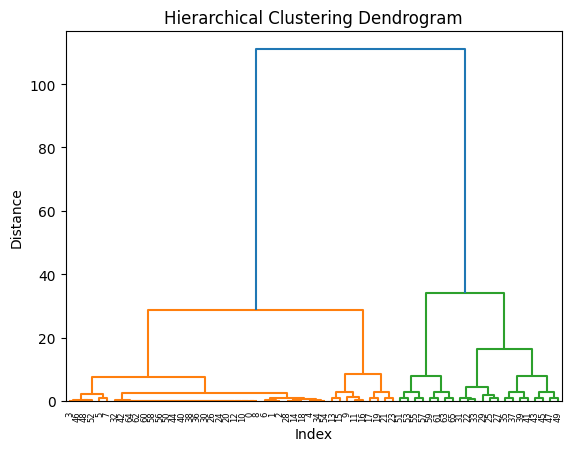

In [17]:
dendrogram(dataLinkage)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import seaborn as sns
import os

In [19]:
df = pd.DataFrame(newData)
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = clustering.fit_predict(df)
newData['Cluster'] = clusters

In [28]:
dirPath = "D:\\projects\\DropWrap\\BackEnd\\Test\\ModelTesting\\outputData\\" + state
os.mkdir(path=dirPath)

filePath = dirPath + var + ".csv"
newData.to_csv(filePath)

<string>:3: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\{'
<string>:3: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\{'
C:\Users\ARNAB CHARIT\AppData\Local\Temp\ipykernel_18496\104985279.py:3: SyntaxWarning: invalid escape sequence '\{'
  newData.to_csv(f"..\\projects\\DropWrap\\BackEnd\\Test\\ModelTesting\\outputData\{var}.csv")
C:\Users\ARNAB CHARIT\AppData\Local\Temp\ipykernel_18496\104985279.py:3: SyntaxWarning: invalid escape sequence '\{'
  newData.to_csv(f"..\\projects\\DropWrap\\BackEnd\\Test\\ModelTesting\\outputData\{var}.csv")


OSError: Cannot save file into a non-existent directory: '..\projects\DropWrap\BackEnd\Test\ModelTesting\outputData'

In [ ]:
newData

In [ ]:
sns.scatterplot(data=newData, x='var', y='Cluster', hue='Cluster', palette='tab10')
plt.title('Agglomerative Clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
dendrogram(dataLinkage)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()